In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [41]:
df= pd.read_csv('homeprices.csv', sep='\t') #df= data frame
print(df)
print(df.columns)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000
Index(['area', 'price'], dtype='object')


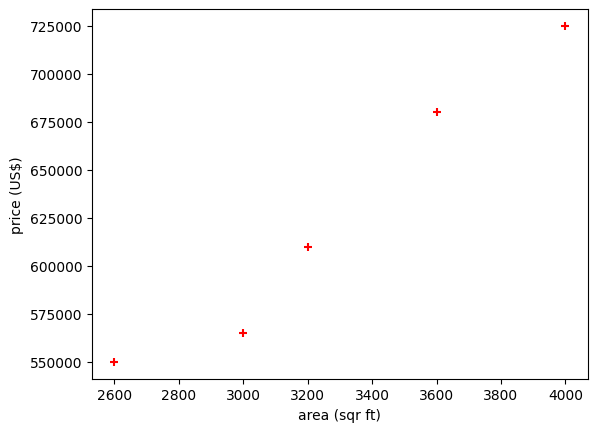

In [42]:
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [43]:
reg= linear_model.LinearRegression()
reg.fit(df[['area']],df.price) # fit is used to train the model. Fit take 2 arguments, 1st is the independent variable and 2nd is the dependent variable as 2D array (data frame) 


LinearRegression()

In [44]:
reg.predict([[3300]]) #predict the price of the house with area 3300 sqr ft

/Users/hritul/DeveloperTools/MLOPS/Linear Regression Single Variable/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [45]:
print(reg.coef_ )#slope of the line
print(reg.intercept_ )#intercept of the line

[135.78767123]
180616.43835616432


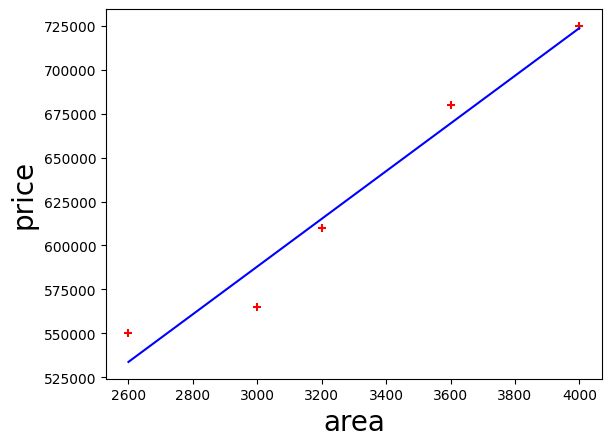

In [46]:
%matplotlib inline
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue') #plotting the line

In [47]:
df_new= pd.read_csv('areas.csv')
df_new

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [48]:
prices=reg.predict(df_new)
print(prices)

[ 316404.10958904  384297.94520548  492928.08219178  661304.79452055
  740061.64383562  799808.21917808  926090.75342466  650441.78082192
  825607.87671233  492928.08219178 1402705.47945205 1348390.4109589
 1144708.90410959]


In [49]:
df_new['prices']=prices
df_new

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [50]:
df_new.to_csv('prediction.csv',index=False ,sep='\t')